In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os, sys
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath("__file__"))))
from nbafuns import *
import requests
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [2]:
from_year = 2021
player_dict = get_players(league='WNBA',from_year=from_year, to_year=from_year)

In [3]:
data = pd.read_csv('ShotLocationData\WNBA_Shot_Loc_{0}.csv'.format(from_year))

In [4]:
data.head()

,game_id,period,clock,seconds_remaining,poss_length,team_id,team_name,player_id,player_name,locX,locY,distance,shot_value,shot_type,is_made,is_assisted,player_ast_id,player_ast_name,is_putback
0,1022100001,1,09:37,577.0,23.0,1611661325,Indiana Fever,202658,Danielle Robinson,18,16,2.4,2,AtRim,False,False,0,None,False
1,1022100001,1,09:16,556.0,7.0,1611661313,New York Liberty,1629477,Sabrina Ionescu,120,129,17.6,2,LongMidRange,False,False,0,None,False
2,1022100001,1,08:47,527.0,17.0,1611661313,New York Liberty,1630446,Michaela Onyenwere,160,198,25.5,3,Arc3,True,True,1628244,Sami Whitcomb,False
3,1022100001,1,08:23,503.0,24.0,1611661325,Indiana Fever,1628909,Kelsey Mitchell,101,17,10.2,2,ShortMidRange,False,False,0,None,False
4,1022100001,1,08:18,498.0,3.0,1611661325,Indiana Fever,1628927,Victoria Vivians,24,251,25.2,3,Arc3,False,False,0,None,False


In [5]:
bball_gray = '#312f30'
bball_white = '#dddee0'
bball_orange = '#f87c24'
bball_light_orange = '#fbaf7b'
bball_black = '#000010'
dark_grey = '#282828'
fontsize = 32
title_size = 48

In [7]:
player = 'Brittney Griner'
team = 'Phoenix Mercury'

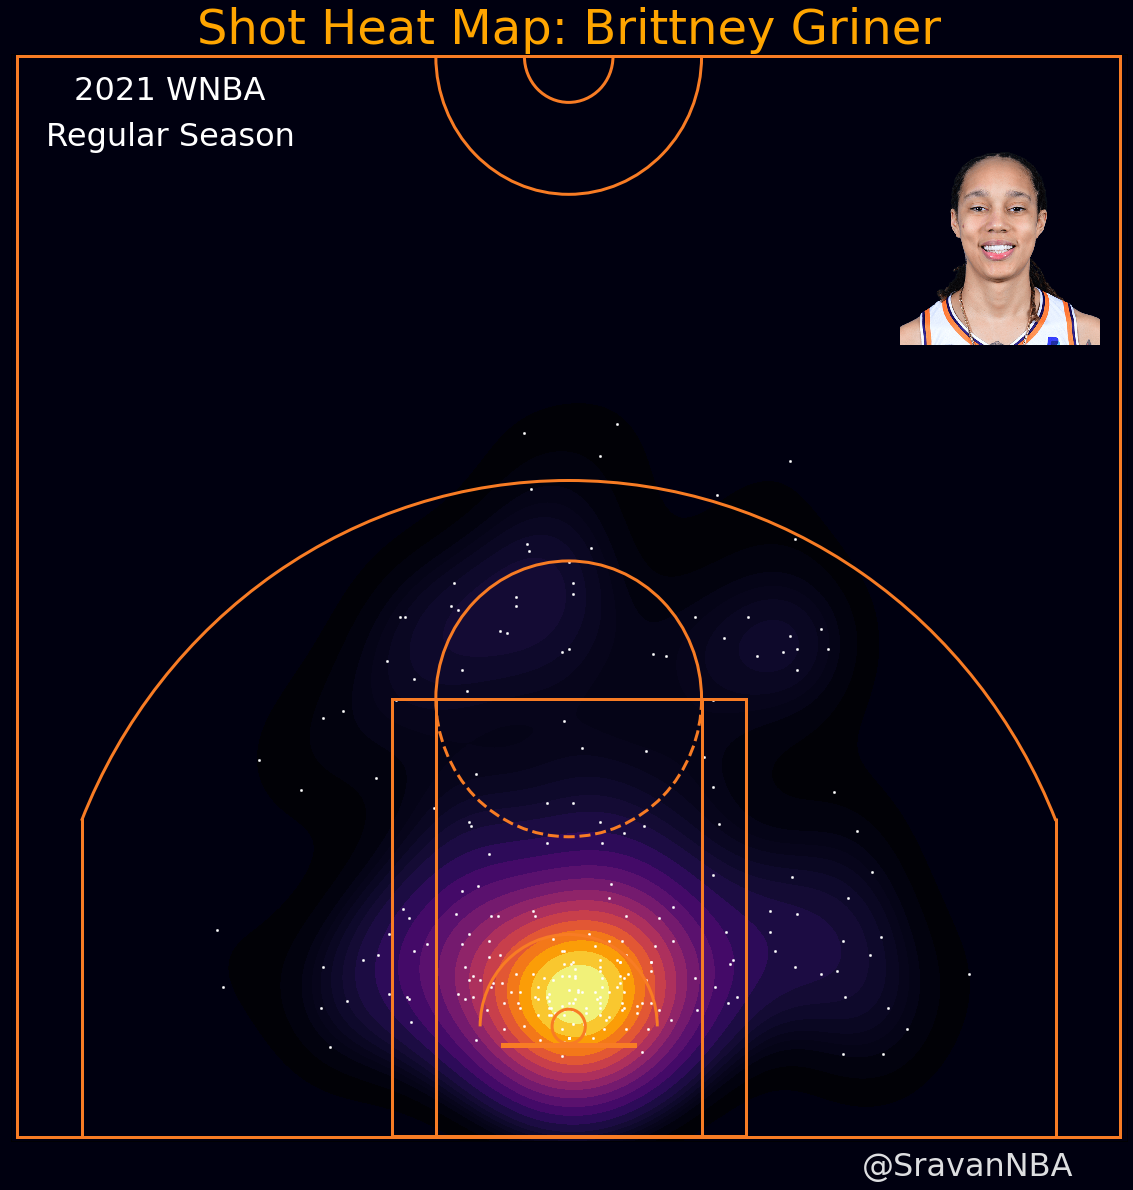

In [8]:
fig= plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)

d1 = 15
d2 = 22
t1 = 12
t2 = 16
cond1 = (data["player_name"] == player) 

cond2 = (data['shot_type'] != 'AtRim')
cond3 = (data['distance'] >= d1)
cond4 = (data['distance'] < d2)
cond5 = (data['poss_length'] >= 24)
cond6 = (data['poss_length'] <= 37)
cond7 = (data['shot_type'] == 'LongMidRange')
cond8 = (data['player_ast_name'] == player) 
cond9 = (data["team_name"] == team) 
cond0 = (data['is_made']==True)

# shots_df = data[cond3 & cond4]
shots_df = data[cond1]
player_id = shots_df['player_id'].iloc[1]
# player_id = shots_df['player_ast_id'].iloc[1]

ax.set_xlim(252,-252)
ax.set_ylim(-50,423)
ax.set_facecolor(bball_black)
fig.set_facecolor(bball_black)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
draw_court(ax=ax,outer_lines=True, lw=3, color=bball_orange)
sns.kdeplot( x = shots_df.locX, y = shots_df.locY, shade=True, cmap='inferno',levels=21,ax=ax)
ax.scatter(x = shots_df.locX, y = shots_df.locY, facecolors='w', s=5, linewidths=0.5)

ax.text(x=-180, y=-65, s="@SravanNBA", color=bball_white, fontsize=fontsize, ha='center')
target_dir = 'player_imgs'
if f"{player_id}.png" not in os.listdir(target_dir):
    url = f"https://ak-static.cms.nba.com/wp-content/uploads/headshots/wnba/{player_id}.png"
    response = requests.get(url)
    with open(f'player_imgs/{player_id}.png', 'wb') as f:
        f.write(response.content)
ab = AnnotationBbox(OffsetImage(plt.imread(f'player_imgs/{player_id}.png'), zoom=0.4), (-195, 340), frameon=False)
ax.add_artist(ab)
ax.text(x=180, y=400, s="{0} WNBA".format(from_year), color='White', fontsize=fontsize, ha='center',va='bottom')
ax.text(x=180, y=380, s="Regular Season", color='White', fontsize=fontsize, ha='center',va='bottom')
# ax.set_title('Shot Heat Map: Distance (ft) > {0} '.format(d1,d2), size=title_size, color='Orange')
# ax.set_title('Shot Heat Map: {0} < Distance (ft) < {1}'.format(d1,d2), size=title_size, color='Orange')
# plt.savefig('Shot_Heat_Map_dis_{0}_{1}.png'.format(d1,d2), bbox_inches='tight', facecolor=bball_black,dpi=300)
ax.set_title('Shot Heat Map: {0}'.format(player), size=title_size, color='Orange')
# ax.text(x=-180, y=400, s="Makes Only", color='White', fontsize=fontsize, ha='center',va='bottom')
# ax.text(x=-180, y=380, s="Non-Rim Attempts", color='White', fontsize=fontsize, ha='center',va='bottom')
plt.savefig('Shot_Heat_Map_{0}.png'.format(player), bbox_inches='tight', facecolor=bball_black,dpi=300)
# ax.set_title('Shots Assisted by: {0}'.format(player), size=title_size, color='Orange')
# plt.savefig('Assist_Heat_Map_{0}.png'.format(player), bbox_inches='tight', facecolor=bball_black,dpi=300)
# ax.text(x=180, y=400, s="{0}-{1} NBA".format(from_year,from_year+1), color='White', fontsize=fontsize, ha='center',va='bottom')
# ax.set_title('Shot Heat Map: {0}'.format(team), size=title_size, color='Orange')
# plt.savefig('Shot_Heat_Map_{0}.png'.format(team), bbox_inches='tight', facecolor=bball_black,dpi=300)
# ax.set_title('WNBA Shot Heat Map: {0}-{1}'.format(from_year,from_year+1), size=title_size, color='Orange')
# plt.savefig('Shot_Heat_Map_{0}_{1}.png'.format(from_year,from_year+1), bbox_inches='tight', facecolor=bball_black,dpi=300)
plt.show()

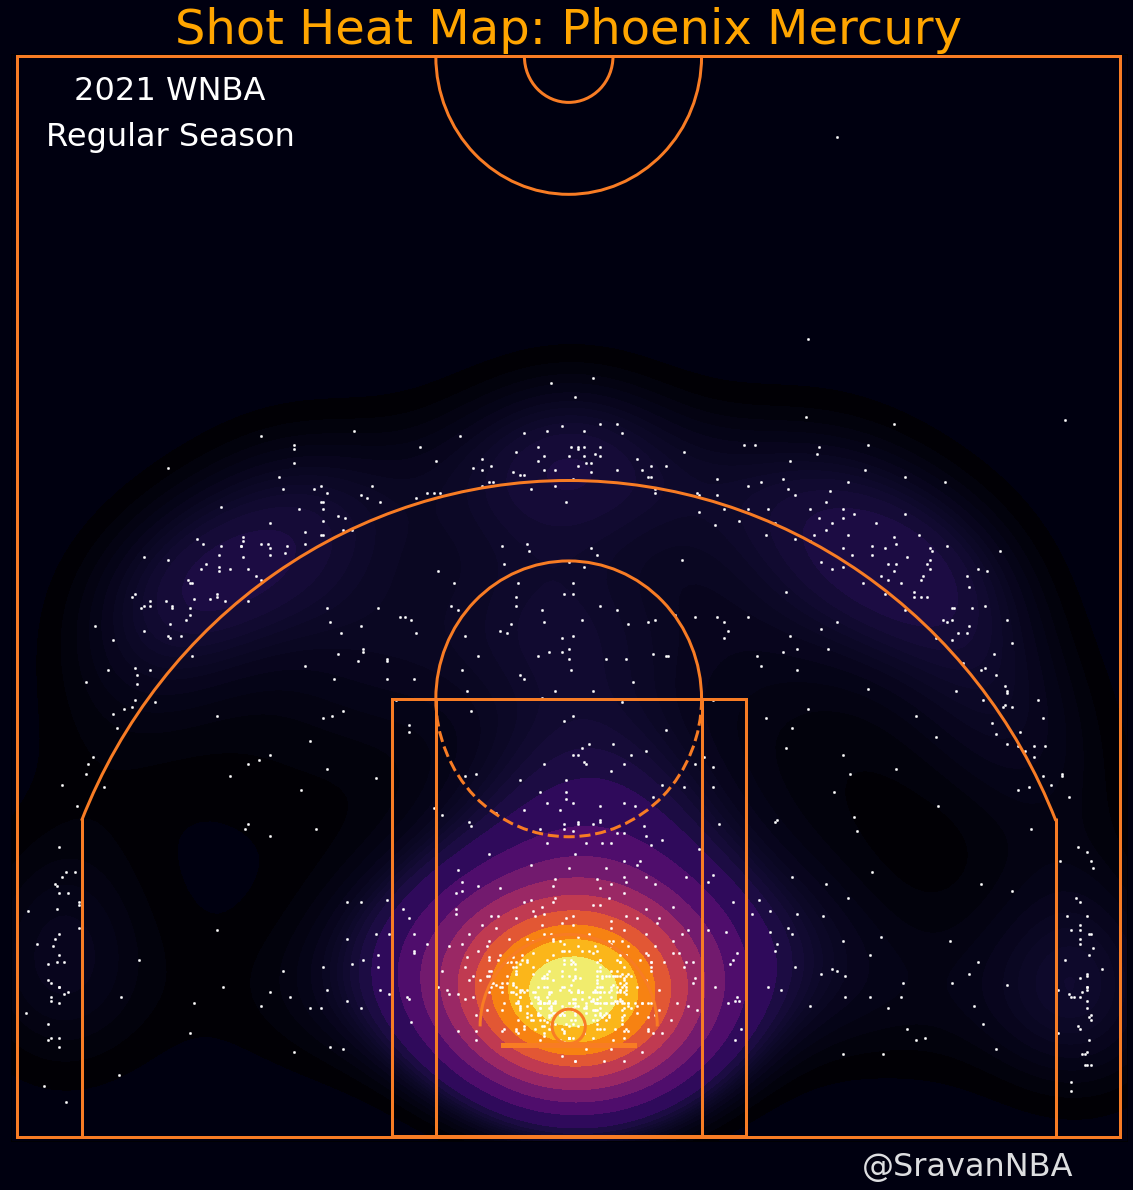

In [9]:
fig= plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)

# player = "Betnijah Laney"
# team = 'Los Angeles Sparks'

d1 = 15
d2 = 22
t1 = 12
t2 = 16
cond2 = (data['shot_type'] != 'AtRim')
cond3 = (data['distance'] >= d1)
cond4 = (data['distance'] < d2)
cond5 = (data['poss_length'] >= 24)
cond6 = (data['poss_length'] <= 37)
cond7 = (data['shot_type'] == 'LongMidRange')
cond9 = (data["team_name"] == team) 
cond0 = (data['is_made']==True)

# shots_df = data[cond3 & cond4]
shots_df = data[cond9]
player_id = shots_df['player_id'].iloc[1]
# player_id = shots_df['player_ast_id'].iloc[1]

ax.set_xlim(252,-252)
ax.set_ylim(-50,423)
ax.set_facecolor(bball_black)
fig.set_facecolor(bball_black)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
draw_court(ax=ax,outer_lines=True, lw=3, color=bball_orange)
sns.kdeplot( x = shots_df.locX, y = shots_df.locY, shade=True, cmap='inferno',levels=21,ax=ax)
ax.scatter(x = shots_df.locX, y = shots_df.locY, facecolors='w', s=5, linewidths=0.5)

ax.text(x=-180, y=-65, s="@SravanNBA", color=bball_white, fontsize=fontsize, ha='center')
target_dir = 'player_imgs'
ax.text(x=180, y=400, s="{0} WNBA".format(from_year), color='White', fontsize=fontsize, ha='center',va='bottom')
ax.text(x=180, y=380, s="Regular Season", color='White', fontsize=fontsize, ha='center',va='bottom')
ax.set_title('Shot Heat Map: {0}'.format(team), size=title_size, color='Orange')
plt.savefig('Shot_Heat_Map_{0}.png'.format(team), bbox_inches='tight', facecolor=bball_black,dpi=300)
plt.show()